# Newport Census Data Visualizations

This notebook explores some of the 2010 census data for Newport, along with some other 
local datasets.

In [1]:
import geopandas as gpd
import pysal as ps
import matplotlib as mpl
import matplotlib.pyplot as plt

# set default figure size
mpl.rcParams['figure.figsize'] = (16, 16)

In [2]:
# import data into geopandas GeoDataFrame
ri_data = gpd.read_file("./source-data/census2010/censusSF1_2010/censusSF1_2010.shp")
ripta_stops = gpd.read_file("./source-data/bus-stops/RIPTAstops0916/RIPTAstops0916.shp")
# extract newport data
newport_data = ri_data[ri_data['RIMUNI10'] == 'Newport city']
newport_stops = ripta_stops[ripta_stops.geometry.within(newport_data.unary_union)]

The code above uses the `unary_union` method to return a `shapely` object representing the total bounds of the `newport_data` GeoDataFrame.

## Basic housing unit density

In [3]:
# make new geodataframe for the density calculations
hu_density = gpd.GeoDataFrame(newport_data[['HU1', 'ALAND10', 'geometry']]).fillna(0)
hu_density.loc[:, 'density'] = hu_density.HU1.values / hu_density.ALAND10.values
max_dens = hu_density.density.max()
# normalize density for plotting
hu_density.loc[:, 'density'] = hu_density.density.values / hu_density.density.max()

/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


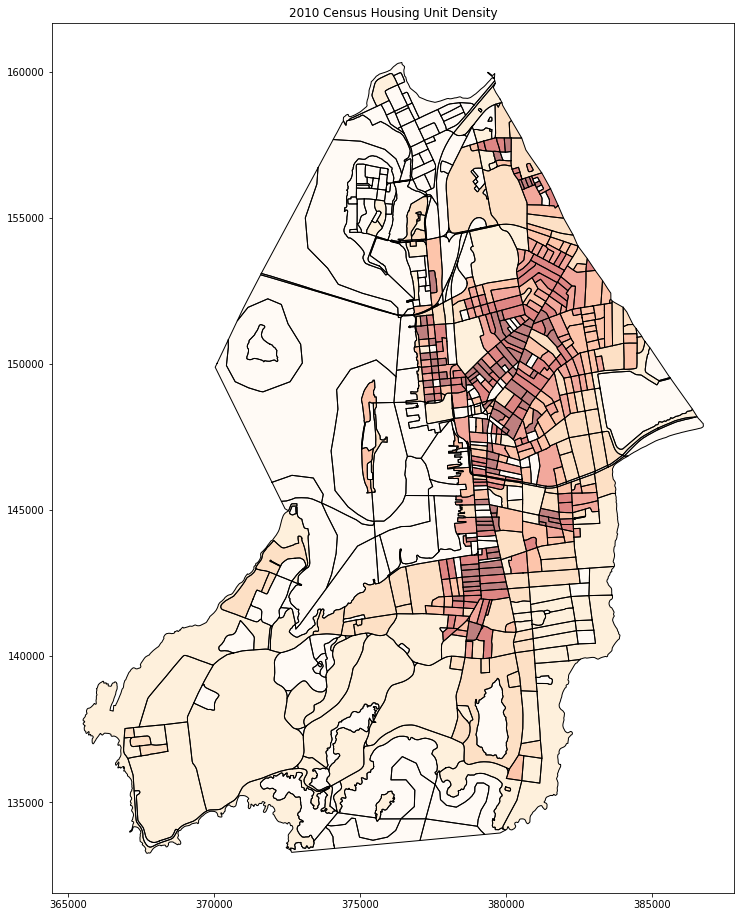

In [4]:
hu_density.plot(column='density', scheme='QUANTILES', k=9, cmap='OrRd')
plt.title('2010 Census Housing Unit Density')
plt.show()

### Bus Stops
Let's look at where bus stops are placed relative to housing unit density.

/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/home/paul/anaconda3/envs/geoutils/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


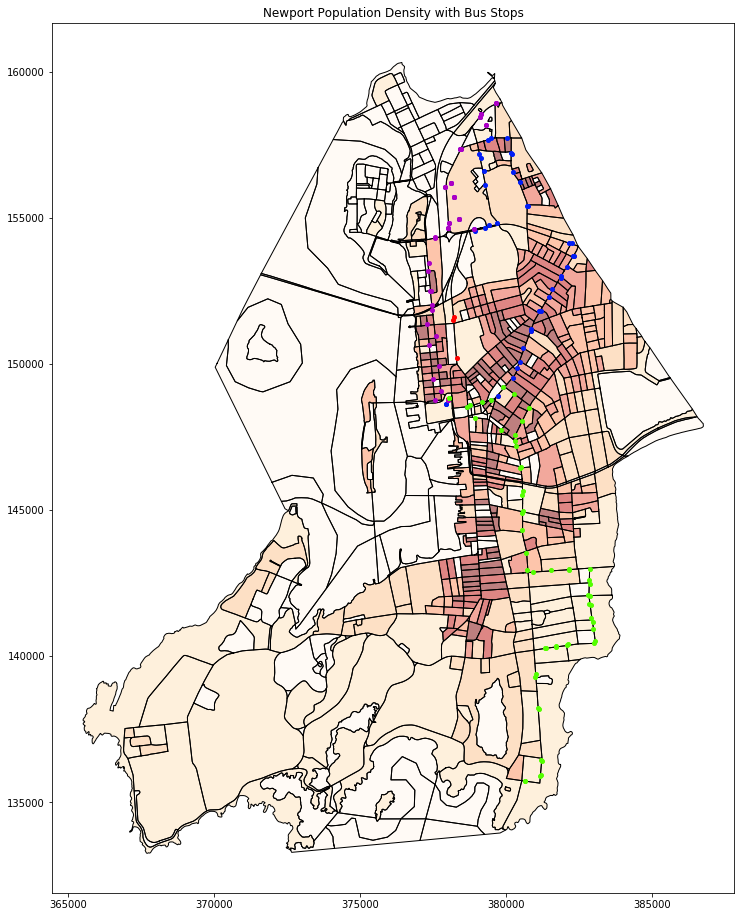

In [5]:
fig, ax = plt.subplots()
# set aspect to equal
ax.set_aspect('equal')

hu_density.plot(ax=ax, column='density', scheme='QUANTILES', k=9, cmap='OrRd')
newport_stops.plot(
    ax=ax, 
    marker='o', 
    column='ROUTE', 
    cmap='prism', 
    markersize=4, 
    label='RIPTA Stops')

plt.title('Newport Population Density with Bus Stops')
plt.show()